# GridSearch CV implementation

This notebook consists of classifying MBTI types using 


1.   Support Vector Machine
2.   Random Classifier
3.   Logistic Regression
4.   Decision Tree
5.   XGBoost Classifier
6.   CatBoost Classier


These 6 algorthims have been tested using 3 cross validation folds with various hyperparameters

The best parameters were eventually filtered out and applied to each model to derive the best possible results.

All training examples were used regardless of proportion of class sizes. 



In [18]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.metrics import accuracy_score as acs
import warnings

from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.ensemble import HistGradientBoostingClassifier



In [19]:
!git clone https://github.com/placid-brain/CDS-Project-2021.git

fatal: destination path 'CDS-Project-2021' already exists and is not an empty directory.


In [20]:
df = pd.read_csv("/content/CDS-Project-2021/personality_dataset/mbti_basic_cleaned_dataset.csv")
df.head()

,type,posts
0,INFJ,enfp intj moments sportscenter top ten plays p...
1,ENTP,finding lack posts alarming sex boring positio...
2,INTP,good one course say know blessing curse absolu...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,fired another silly misconception approaching ...


In [21]:
df["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [22]:
train_df, test_df = train_test_split(df,test_size=0.3,random_state=42,stratify=df.type )

In [23]:


train_df_index_list=list(train_df.index)

test_df_index_list=list(test_df.index)


## Converting the input data

This package helps us to convert the words into a matrix of documents and a token counts to better process the text.

Whereas, LabelEncoder was used for the MBTI types to allot a number to each class

In [24]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer(max_features=500)
  
vectorizer.fit(train_df['posts'].astype('U'))
#vectorizer.fit(test_df['posts'].astype('U'))

#train_df.posts.values.astype('U')
#test_df.posts.values.astype('U')

train_df_vector = vectorizer.transform(train_df.posts.astype('U')).toarray()

test_df_vector = vectorizer.transform(test_df.posts.astype('U')).toarray()

print(train_df_vector.shape)
print(test_df_vector.shape)

(6072, 500)
(2603, 500)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


train_df_target = le.fit_transform(train_df.type)
test_df_target = le.fit_transform(test_df.type)

print(train_df_target.shape)
print(test_df_target.shape)

(6072,)
(2603,)


In [26]:
# dictionary to store model accuracy

accuracy_record={}

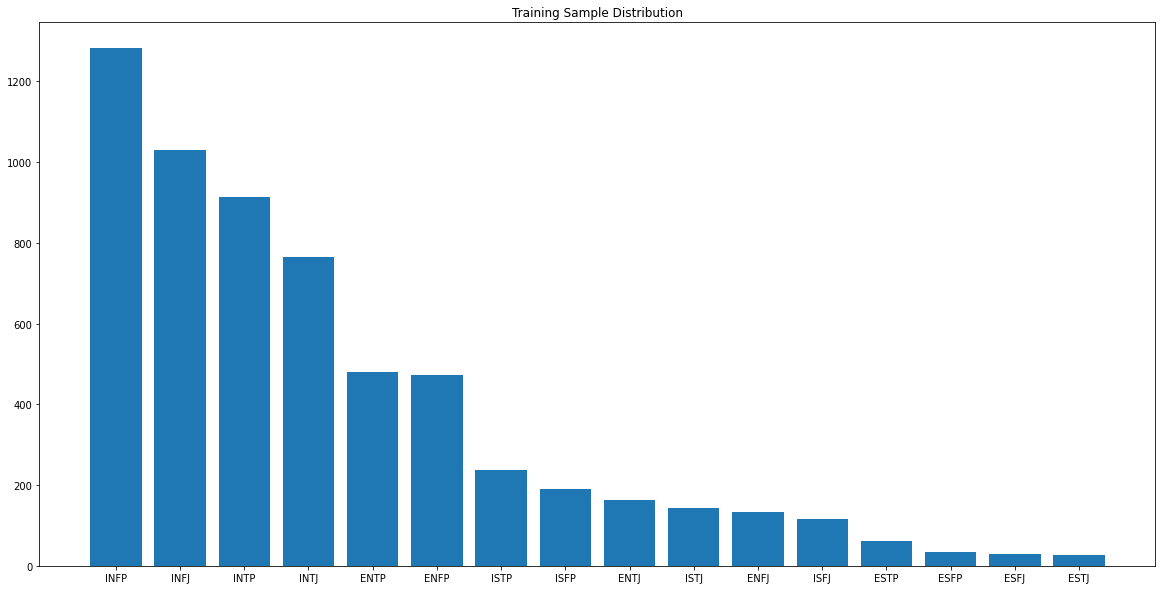

In [27]:
# Constructing training examples graph

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(20,10))



train_label_df=pd.DataFrame(train_df['type'].value_counts())



plt.bar(train_label_df.index, train_label_df['type'])
plt.title("Training Sample Distribution")
plt.show()

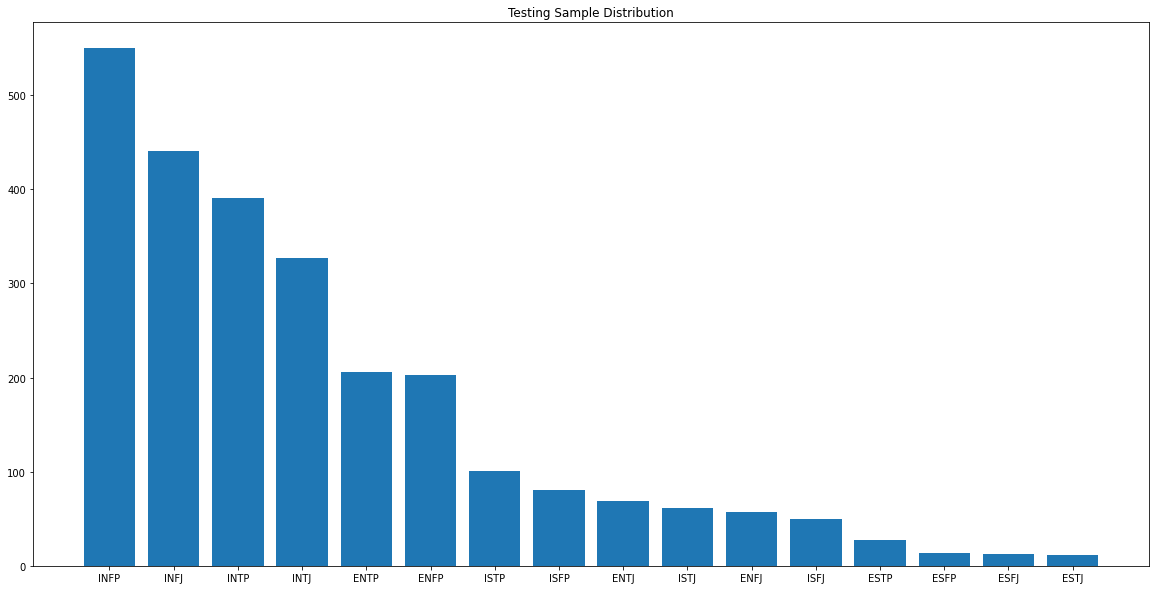

In [28]:
# Constructing testing examples graph



f, ax = plt.subplots(figsize=(20,10))



test_label_df=pd.DataFrame(test_df['type'].value_counts())



plt.bar(test_label_df.index, test_label_df['type'])
plt.title("Testing Sample Distribution")
plt.show()

## Support Vector Machine




1.   Grid Search Implementation
2.   Displaying of results in dataframe
3.   Recording accuracy of SVM in accuracy record



In [53]:
# 1


clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=3, return_train_score=False)
clf.fit(train_df_vector, train_df_target)



GridSearchCV(cv=3, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [54]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
0,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.613636,0.604743,0.594862,0.604414
1,1,linear,"{'C': 1, 'kernel': 'linear'}",0.543972,0.528162,0.549901,0.540679
2,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.617589,0.618083,0.608202,0.614625
3,10,linear,"{'C': 10, 'kernel': 'linear'}",0.543972,0.528162,0.553360,0.541831
4,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.617095,0.618083,0.608202,0.614460
5,20,linear,"{'C': 20, 'kernel': 'linear'}",0.543972,0.528162,0.553360,0.541831


In [56]:
# 3
from sklearn.metrics import accuracy_score as acs
i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]




C = int(result_df.iloc[i,0])
kernel = str(result_df.iloc[i,1])
svm = SVC(C=C,kernel=kernel,gamma='auto')
svm.fit(train_df_vector,train_df_target)
target_pred = svm.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Support Vector Machine"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")







The accuracy is: 0.6311947752593162






## Random Classifier

1.   Grid Search Implementation
2.   Displaying of results in dataframe
3.   Recording accuracy of Random Classifier in accuracy record


In [32]:
# 1

param_grid = {
    
    
    'max_depth': [80, 90,100,110],
    'max_features': [2,3],
    'min_samples_leaf': [3],
    'min_samples_split': [8,10,12],
    'n_estimators': [100]
}
 

rf = RandomForestClassifier()


clf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=False)
clf.fit(train_df_vector, train_df_target)



Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100]},
             verbose=2)

In [33]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
0,80,2,3,8,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.324111,0.315711,0.341897,0.327240
1,80,2,3,10,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.333004,0.320158,0.321640,0.324934
2,80,2,3,12,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.315711,0.332510,0.325593,0.324605
3,80,3,3,8,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",0.372036,0.364625,0.365119,0.367260
4,80,3,3,10,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",0.375988,0.354249,0.363142,0.364460
5,80,3,3,12,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",0.384387,0.368577,0.378953,0.377306
6,90,2,3,8,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.328063,0.330534,0.340415,0.333004
7,90,2,3,10,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.333992,0.321640,0.340415,0.332016
8,90,2,3,12,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.334486,0.326087,0.325593,0.328722
9,90,3,3,8,100,"{'max_depth': 90, 'max_features': 3, 'min_samp...",0.381423,0.357213,0.373518,0.370718


In [34]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



max_depth = int(result_df.iloc[i,0])
max_features= int(result_df.iloc[i,1])
min_samples_leaf= int(result_df.iloc[i,2])
min_samples_split= int(result_df.iloc[i,3])
n_estimators= int(result_df.iloc[i,4])


rf = RandomForestClassifier(max_depth=max_depth ,max_features = max_features, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators )
rf.fit(train_df_vector,train_df_target)

target_pred = rf.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Random Forest"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")






The accuracy is: 0.38263542066845946






## Logistic Regression

1. Grid Search Implementation
2. Displaying of results in dataframe
3. Recording accuracy of Logistic Regression in accuracy record

In [35]:
# 1

from sklearn.linear_model import LogisticRegression

param_grid= {
    "C":[1,5,10],
    "penalty":["l1","l2","elasticnet","none"],
    "solver":["saga"]
}
lr = LogisticRegression()

clf = GridSearchCV(lr, param_grid, cv=3)
clf.fit(train_df_vector, train_df_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']})

In [36]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
0,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.601779,0.580040,0.600296,0.594038
1,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.590415,0.572134,0.594862,0.585804
2,1,elasticnet,saga,"{'C': 1, 'penalty': 'elasticnet', 'solver': 's...",NaN,NaN,NaN,NaN
3,1,none,saga,"{'C': 1, 'penalty': 'none', 'solver': 'saga'}",0.590415,0.571146,0.593874,0.585145
4,5,l1,saga,"{'C': 5, 'penalty': 'l1', 'solver': 'saga'}",0.595850,0.574605,0.597332,0.589262
5,5,l2,saga,"{'C': 5, 'penalty': 'l2', 'solver': 'saga'}",0.590415,0.571146,0.594368,0.585310
6,5,elasticnet,saga,"{'C': 5, 'penalty': 'elasticnet', 'solver': 's...",NaN,NaN,NaN,NaN
7,5,none,saga,"{'C': 5, 'penalty': 'none', 'solver': 'saga'}",0.591403,0.570652,0.593379,0.585145
8,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.591897,0.571146,0.594368,0.585804
9,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.590415,0.572134,0.592885,0.585145


In [37]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



C = int(result_df.iloc[i,0])
penalty =str(result_df.iloc[i,1])
solver= str(result_df.iloc[i,2])


lr = LogisticRegression(C=C, penalty= penalty, solver= solver)
lr.fit(train_df_vector,train_df_target)

target_pred = lr.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Logistic Regression"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")






The accuracy is: 0.6054552439492893






/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


## Decision Trees

1. Grid Search Implementation
2. Displaying of results in dataframe
3. Recording accuracy of Decision Tree in accuracy record

In [38]:
# 1

from sklearn.tree import DecisionTreeClassifier

param_grid={
    
    'max_depth': [80, 90,100,110],
    'max_features': [2,3],
    'min_samples_leaf': [3],
    'min_samples_split': [8,10,12],
    'random_state': [42,20,10],
    'max_leaf_nodes': [2,3,4]
    
    
}

dt = DecisionTreeClassifier()
print(dt.get_params(deep=True))

clf = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, verbose = 2, return_train_score=False)

clf.fit(train_df_vector,train_df_target)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=20; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=20; total t

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [3],
                         'min_samples_split': [8, 10, 12],
                         'random_state': [42, 20, 10]},
             verbose=2)

In [39]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
0,80,2,2,3,8,42,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.210968,0.210968,0.199605,0.207181
1,80,2,2,3,8,20,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.211462,0.210968,0.210968,0.211133
2,80,2,2,3,8,10,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.211462,0.210968,0.210968,0.211133
3,80,2,2,3,10,42,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.210968,0.210968,0.199605,0.207181
4,80,2,2,3,10,20,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.211462,0.210968,0.210968,0.211133
...,...,...,...,...,...,...,...,...,...,...,...
211,110,3,4,3,10,20,"{'max_depth': 110, 'max_features': 3, 'max_lea...",0.199605,0.208992,0.199605,0.202734
212,110,3,4,3,10,10,"{'max_depth': 110, 'max_features': 3, 'max_lea...",0.224308,0.223814,0.231719,0.226614
213,110,3,4,3,12,42,"{'max_depth': 110, 'max_features': 3, 'max_lea...",0.208498,0.211957,0.195652,0.205369
214,110,3,4,3,12,20,"{'max_depth': 110, 'max_features': 3, 'max_lea...",0.199605,0.208992,0.199605,0.202734


In [40]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



max_depth = int(result_df.iloc[i,0])
max_features= int(result_df.iloc[i,1])
min_samples_leaf= int(result_df.iloc[i,2])
min_samples_split= int(result_df.iloc[i,3])
random_state= int(result_df.iloc[i,4])
max_leaf_nodes=int(result_df.iloc[i,5])


dt = DecisionTreeClassifier(max_depth=max_depth ,max_features = max_features, min_samples_leaf=min_samples_leaf,min_samples_split= min_samples_split ,random_state=random_state,   max_leaf_nodes=max_leaf_nodes )
dt.fit(train_df_vector,train_df_target)

target_pred = dt.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Decision Tree"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")






The accuracy is: 0.2086054552439493






## XGBoost Classifier

1. Grid Search Implementation
2. Displaying of results in dataframe
3. Recording accuracy of XGBoost Classifier in accuracy record

In [41]:
# 1

import xgboost as xgb

param_grid={
    
    
    'max_depth': [5,10],
    
    'max_delta_step': [1,3],
    
    'learning_rate': [0.1,0.5],
    'n_estimators': [50,100]
    
    
}

xgb = xgb.XGBClassifier()


clf = GridSearchCV(estimator = xgb , param_grid = param_grid, 
                          cv = 3, verbose = 2, return_train_score=False)

clf.fit(train_df_vector,train_df_target)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=  51.2s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=  50.6s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=  50.6s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=100; total time= 1.7min
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=100; total time= 1.7min
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=100; total time= 1.7min
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=10, n_estimators=50; total time= 1.7min
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=10, n_estimators=50; total time= 1.7min
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=10, n_estimators=50; total time= 1.6min
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=10, n_estimators=100; 

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.5], 'max_delta_step': [1, 3],
                         'max_depth': [5, 10], 'n_estimators': [50, 100]},
             verbose=2)

In [42]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_learning_rate,param_max_delta_step,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
0,0.1,1,5,50,"{'learning_rate': 0.1, 'max_delta_step': 1, 'm...",0.660573,0.653656,0.644269,0.652833
1,0.1,1,5,100,"{'learning_rate': 0.1, 'max_delta_step': 1, 'm...",0.668972,0.651186,0.650692,0.656950
2,0.1,1,10,50,"{'learning_rate': 0.1, 'max_delta_step': 1, 'm...",0.652174,0.649209,0.633399,0.644928
3,0.1,1,10,100,"{'learning_rate': 0.1, 'max_delta_step': 1, 'm...",0.660079,0.658597,0.634881,0.651186
4,0.1,3,5,50,"{'learning_rate': 0.1, 'max_delta_step': 3, 'm...",0.662055,0.661561,0.651680,0.658432
5,0.1,3,5,100,"{'learning_rate': 0.1, 'max_delta_step': 3, 'm...",0.665020,0.651680,0.652668,0.656456
6,0.1,3,10,50,"{'learning_rate': 0.1, 'max_delta_step': 3, 'm...",0.651186,0.647727,0.628953,0.642622
7,0.1,3,10,100,"{'learning_rate': 0.1, 'max_delta_step': 3, 'm...",0.666996,0.653162,0.640810,0.653656
8,0.5,1,5,50,"{'learning_rate': 0.5, 'max_delta_step': 1, 'm...",0.661067,0.654150,0.646245,0.653821
9,0.5,1,5,100,"{'learning_rate': 0.5, 'max_delta_step': 1, 'm...",0.664526,0.657115,0.655632,0.659091


In [43]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



max_depth = int(result_df.iloc[i,0])
max_delta_step= int(result_df.iloc[i,1])
learning_rate= float(result_df.iloc[i,2])
n_estimators= int(result_df.iloc[i,3])



xgb = XGBClassifier(max_depth=max_depth ,max_delta_step = max_delta_step, learning_rate=learning_rate,n_estimators= n_estimators  )

xgb.fit(train_df_vector,train_df_target)

target_pred = xgb.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["XGBoost Classifier"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")






The accuracy is: 0.15021129466000768






## CatBoost Classifier

1. Grid Search Implementation
2. Displaying of results in dataframe
3. Recording accuracy of CatBoost Classifier in accuracy record

In [44]:
# 1
!pip3 install catboost
from catboost import CatBoostClassifier

param_grid={
    
    
    
    'depth': [4,5],
    
    
    
    'learning_rate': [0.1,0.5]
 
    
    
}

catboost = CatBoostClassifier()


clf = GridSearchCV(estimator = catboost , param_grid = param_grid, 
                          cv = 3, verbose = 2, return_train_score=False)

clf.fit(train_df_vector,train_df_target)

Streaming output truncated to the last 5000 lines.
4:	learn: 2.0537467	total: 708ms	remaining: 2m 20s
5:	learn: 1.9989040	total: 824ms	remaining: 2m 16s
6:	learn: 1.9429779	total: 973ms	remaining: 2m 18s
7:	learn: 1.9116677	total: 1.1s	remaining: 2m 16s
8:	learn: 1.8770531	total: 1.23s	remaining: 2m 15s
9:	learn: 1.8449616	total: 1.36s	remaining: 2m 15s
10:	learn: 1.8112951	total: 1.5s	remaining: 2m 14s
11:	learn: 1.7845554	total: 1.66s	remaining: 2m 16s
12:	learn: 1.7501966	total: 1.8s	remaining: 2m 16s
13:	learn: 1.7295273	total: 1.92s	remaining: 2m 14s
14:	learn: 1.7003866	total: 2.06s	remaining: 2m 15s
15:	learn: 1.6756651	total: 2.19s	remaining: 2m 15s
16:	learn: 1.6499495	total: 2.36s	remaining: 2m 16s
17:	learn: 1.6316253	total: 2.49s	remaining: 2m 15s
18:	learn: 1.6111105	total: 2.62s	remaining: 2m 15s
19:	learn: 1.5970272	total: 2.74s	remaining: 2m 14s
20:	learn: 1.5834969	total: 2.86s	remaining: 2m 13s
21:	learn: 1.5715858	total: 2.96s	remaining: 2m 11s
22:	learn: 1.5608270	t

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f0211c173d0>,
             param_grid={'depth': [4, 5], 'learning_rate': [0.1, 0.5]},
             verbose=2)

In [45]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
0,4,0.1,"{'depth': 4, 'learning_rate': 0.1}",0.689723,0.679348,0.655632,0.674901
1,4,0.5,"{'depth': 4, 'learning_rate': 0.5}",0.641798,0.627470,0.625000,0.631423
2,5,0.1,"{'depth': 5, 'learning_rate': 0.1}",0.680336,0.667490,0.656621,0.668149
3,5,0.5,"{'depth': 5, 'learning_rate': 0.5}",0.642787,0.616107,0.621542,0.626812


In [46]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]




depth= int(result_df.iloc[i,0])
learning_rate= float(result_df.iloc[i,1])



catboost = CatBoostClassifier(  loss_function='MultiClass',eval_metric='MultiClass'  , depth=depth      ,  learning_rate=learning_rate )

catboost.fit(train_df_vector,train_df_target)

target_pred = catboost.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Catboost Classifier"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")



0:	learn: 2.5303605	total: 174ms	remaining: 2m 54s
1:	learn: 2.3744492	total: 342ms	remaining: 2m 50s
2:	learn: 2.2391145	total: 509ms	remaining: 2m 49s
3:	learn: 2.1462745	total: 658ms	remaining: 2m 43s
4:	learn: 2.0725371	total: 797ms	remaining: 2m 38s
5:	learn: 2.0081395	total: 965ms	remaining: 2m 39s
6:	learn: 1.9552510	total: 1.11s	remaining: 2m 37s
7:	learn: 1.9113126	total: 1.25s	remaining: 2m 34s
8:	learn: 1.8675849	total: 1.44s	remaining: 2m 38s
9:	learn: 1.8309183	total: 1.57s	remaining: 2m 35s
10:	learn: 1.8013379	total: 1.74s	remaining: 2m 36s
11:	learn: 1.7632534	total: 1.9s	remaining: 2m 36s
12:	learn: 1.7408290	total: 2.04s	remaining: 2m 35s
13:	learn: 1.7138241	total: 2.23s	remaining: 2m 37s
14:	learn: 1.6886151	total: 2.45s	remaining: 2m 40s
15:	learn: 1.6672520	total: 2.62s	remaining: 2m 41s
16:	learn: 1.6405218	total: 2.74s	remaining: 2m 38s
17:	learn: 1.6206321	total: 2.89s	remaining: 2m 37s
18:	learn: 1.6044225	total: 3.1s	remaining: 2m 39s
19:	learn: 1.5925478	tot

## Accuracy data

In [57]:
print(accuracy_record)

{'Support Vector Machine': 0.6311947752593162, 'Random Forest': 0.38263542066845946, 'Logistic Regression': 0.6054552439492893, 'Decision Tree': 0.2086054552439493, 'XGBoost Classifier': 0.15021129466000768, 'Catboost Classifier': 0.6742220514790627}
